# <font color='#34568B'> 1. Import Libraries </font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys

import pickle
from ipywidgets import interact
from collections import Counter
import time

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_val_predict, RepeatedStratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import imblearn
from imblearn.over_sampling import SMOTE

# Ensure results are reproducible.
np.random.seed(1)

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- Pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- imbalanced-learn {}\n'.format(imblearn.__version__))

Libraries used in this project:
- Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.26.1
- Pandas 1.5.3
- Matplotlib 3.8.0
- Seaborn 0.11.2
- scikit-learn 1.2.2
- imbalanced-learn 0.10.1



# <font color='#34568B'> 2. Load the Data </font>

- It is a csv file with information about water quality. The number of instances is 8000.

In [2]:
dataset = pd.read_csv('./Water/waterQuality1.csv')

# <font color='#34568B'> 3. Exploratory data analysis (EDA) </font>

In [3]:
dataset.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [4]:
dataset.tail()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7994,0.05,7.78,0.00,1.95,0.04,0.10,0.03,0.03,1.37,0.0,...,0.197,14.29,1.0,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.01,0.45,0.02,0.02,1.48,0.0,...,0.031,10.27,1.0,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.03,0.05,0.05,0.02,0.91,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.00,2.00,0.00,0.09,0.00,0.0,...,0.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.00,1
7998,0.04,6.85,0.01,0.70,0.03,0.05,0.01,0.03,1.00,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1


In [5]:
for i, col in enumerate(dataset.columns.to_list()):
    if i == 20:
        print(f'Target column : {col}')
    else:
        print(f'Column {i+1} : {col}')

Column 1 : aluminium
Column 2 : ammonia
Column 3 : arsenic
Column 4 : barium
Column 5 : cadmium
Column 6 : chloramine
Column 7 : chromium
Column 8 : copper
Column 9 : flouride
Column 10 : bacteria
Column 11 : viruses
Column 12 : lead
Column 13 : nitrates
Column 14 : nitrites
Column 15 : mercury
Column 16 : perchlorate
Column 17 : radium
Column 18 : selenium
Column 19 : silver
Column 20 : uranium
Target column : is_safe


In [6]:
dataset_shape = dataset.shape

print('RAW DATASET :')
print(f'Number of rows    : {dataset_shape[0]}\nNumber of columns : {dataset.shape[1]}')

RAW DATASET :
Number of rows    : 7999
Number of columns : 21


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [8]:
for col in dataset.columns.to_list():
    print(f'{col} column has {dataset[col].isnull().sum()} NaN value(s).')

aluminium column has 0 NaN value(s).
ammonia column has 0 NaN value(s).
arsenic column has 0 NaN value(s).
barium column has 0 NaN value(s).
cadmium column has 0 NaN value(s).
chloramine column has 0 NaN value(s).
chromium column has 0 NaN value(s).
copper column has 0 NaN value(s).
flouride column has 0 NaN value(s).
bacteria column has 0 NaN value(s).
viruses column has 0 NaN value(s).
lead column has 0 NaN value(s).
nitrates column has 0 NaN value(s).
nitrites column has 0 NaN value(s).
mercury column has 0 NaN value(s).
perchlorate column has 0 NaN value(s).
radium column has 0 NaN value(s).
selenium column has 0 NaN value(s).
silver column has 0 NaN value(s).
uranium column has 0 NaN value(s).
is_safe column has 0 NaN value(s).


In [9]:
nonnumbers_columns = list(dataset.select_dtypes(['object']).columns)
print(f'Object and boolean type features ({len(nonnumbers_columns)}) :\n\n{nonnumbers_columns}')

Object and boolean type features (2) :

['ammonia', 'is_safe']


In [10]:
number_of_corrupted_values = 0

for col in nonnumbers_columns:
    for i in dataset[col].value_counts().index.to_list():
        try:
            ind = float(i)
        except:
            number_of_corrupted_values += dataset[col].value_counts()[i]
            print(f'{col} column has corrupted index value ({i}) with {dataset[col].value_counts()[i]} values.')

print(f'\nThe total number of corrupted values is : {number_of_corrupted_values}')

ammonia column has corrupted index value (#NUM!) with 3 values.
is_safe column has corrupted index value (#NUM!) with 3 values.

The total number of corrupted values is : 6


In [11]:
dataset[dataset['is_safe'].str.contains('#NUM!') == True]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [12]:
#drop missing values
dataset = dataset[dataset['ammonia'].str.contains('#NUM!') == False]
dataset = dataset[dataset['is_safe'].str.contains('#NUM!') == False]

In [13]:
len(dataset[dataset['is_safe'].str.contains('#NUM!') == True])

0

In [14]:
dataset.shape

(7996, 21)

In [15]:
# convert both columns to numeric data type
dataset['ammonia'] = pd.to_numeric(dataset['ammonia'])
dataset['is_safe'] = pd.to_numeric(dataset['is_safe'])

In [16]:
dataset = dataset.drop_duplicates()

In [17]:
dataset.shape

(7996, 21)

In [18]:
dataset.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


# <font color='#34568B'> 4. Data Visualization </font>

In [19]:
columns = dataset.drop(["is_safe"], axis = 1).columns.to_list()

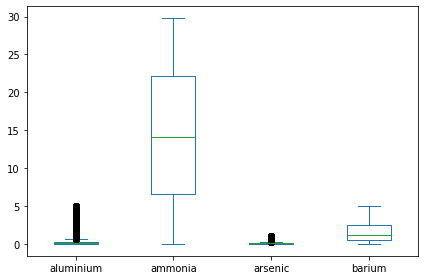

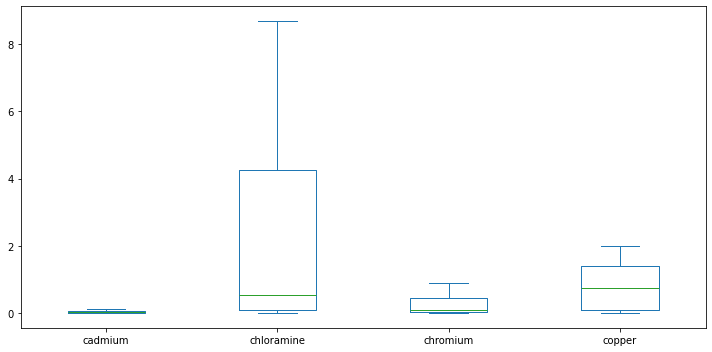

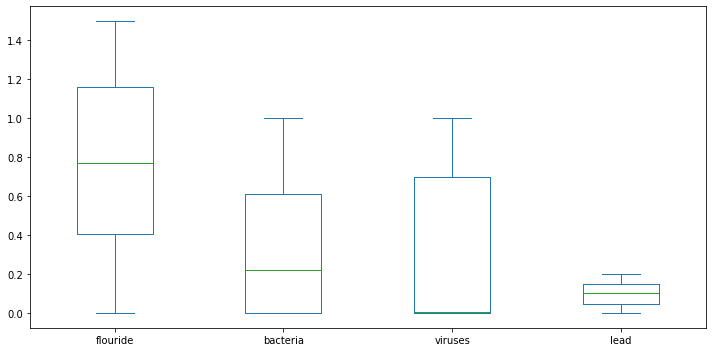

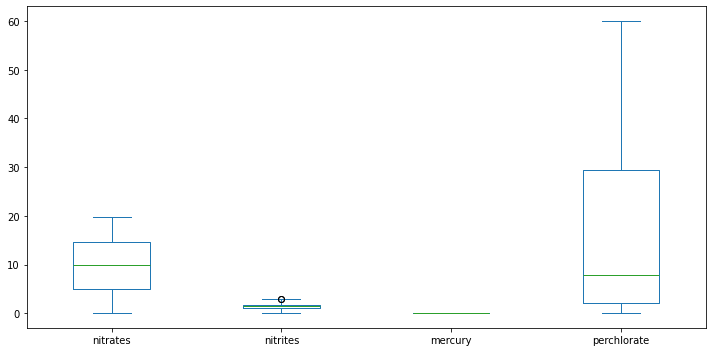

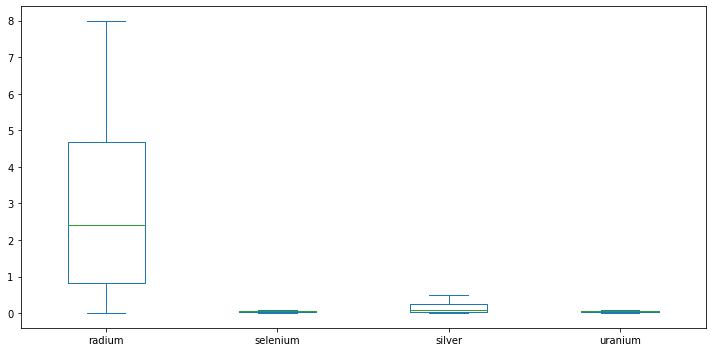

In [20]:
for col in range(0, len(columns), 4):
    plt.rcParams["figure.figsize"] = [10, 5]
    plt.rcParams["figure.autolayout"] = True
    
    ax = dataset[[columns[col], columns[col+1], columns[col+2], columns[col+3]]].plot(kind='box')
    plt.show()

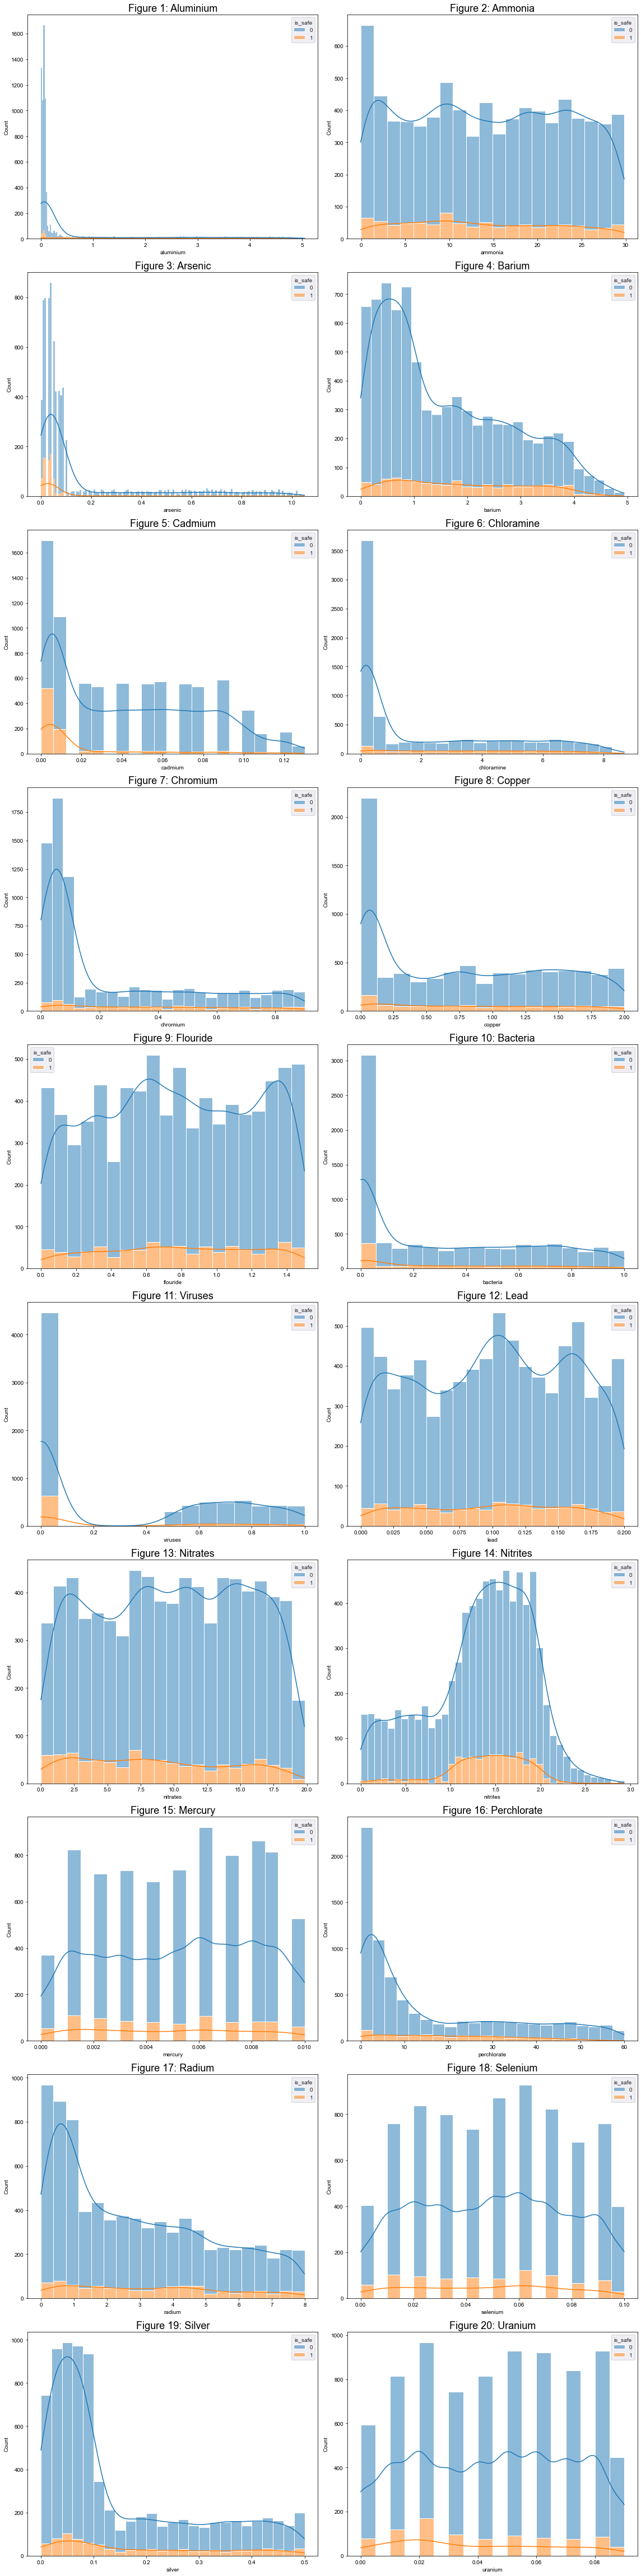

In [21]:
fig, axes = plt.subplots(figsize=(16, 64), nrows = 10, ncols = 2)
sns.set_style("darkgrid")

r, c = 0, 0
for i, col in enumerate(columns):
    sns.histplot(
        dataset, x=col, hue="is_safe", multiple="stack", kde=True, ax=axes[r, c]
    ).set_title("Figure " + str(i + 1) + ": " + col.capitalize(), fontsize=18);
    
    c += 1
    
    if c > 1:
        r += 1
        c = 0

# <font color='#34568B'> 5. Handling Outliers </font>

Handling outliers in this project, we will use **QuantileTransformer** module.

The QuantileTransformer from the sklearn.preprocessing module in scikit-learn is used for transforming features to follow a uniform or a normal distribution. This can be particularly useful when working with machine learning algorithms that make assumptions about the distribution of input features, such as linear models.

In [22]:
cols = {
    "std" : dataset.drop(columns=['is_safe']).std().to_list(),
    "Variance" : dataset.drop(columns=['is_safe']).var().to_list()
}
pd.DataFrame(data=cols, index=dataset.drop(columns=['is_safe']).columns)

,std,Variance
aluminium,1.265323,1.601043
ammonia,8.878930,78.835401
arsenic,0.252632,0.063823
barium,1.216227,1.479209
cadmium,0.036049,0.001300
chloramine,2.567210,6.590565
chromium,0.270663,0.073259
copper,0.653595,0.427186
flouride,0.435423,0.189594
bacteria,0.329497,0.108568


In [23]:
from sklearn.preprocessing import QuantileTransformer

quantile = QuantileTransformer(output_distribution='uniform')
X = quantile.fit_transform(dataset)
quantile.transform(X)
dataset = pd.DataFrame(X)

columns.append('is_safe')
dataset.columns = columns
dataset.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.833500,0.328662,0.399900,0.810310,0.225225,0.430430,0.957958,0.295796,0.037037,0.486486,...,0.277277,0.828829,0.303303,0.674174,0.825450,0.916729,0.812813,0.841842,0.236236,1.0
1,0.865866,0.721722,0.097598,0.875876,0.088589,0.821822,0.879379,0.457958,0.590591,0.779780,...,0.485986,0.101602,0.873874,0.285285,0.776330,0.590591,0.812813,0.778278,0.550050,1.0
2,0.804218,0.496163,0.399900,0.263263,0.253253,0.750250,0.803303,0.049550,0.645145,0.380380,...,0.371872,0.723724,0.292292,0.566567,0.934710,0.934935,0.718719,0.942442,0.125125,0.0
3,0.820427,0.411859,0.399900,0.829329,0.052052,0.949449,0.155656,0.863864,0.706707,0.818318,...,0.097097,0.065065,0.407407,0.374374,0.532221,0.411912,0.197698,0.952452,0.550050,1.0
4,0.797798,0.831433,0.296296,0.088589,0.198699,0.646146,0.884885,0.430430,0.381882,0.439940,...,0.592593,0.325325,0.292292,0.285285,0.639667,0.498999,0.197698,0.367868,0.236236,1.0


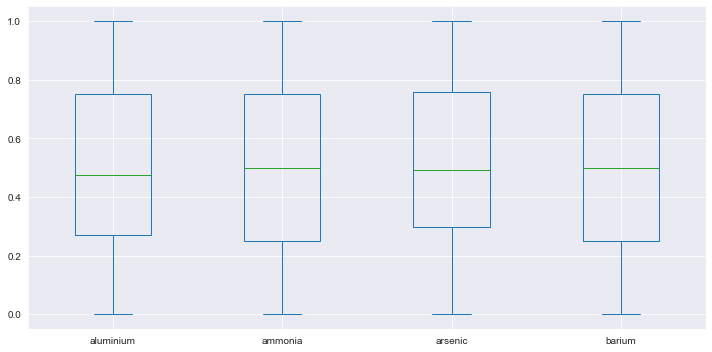

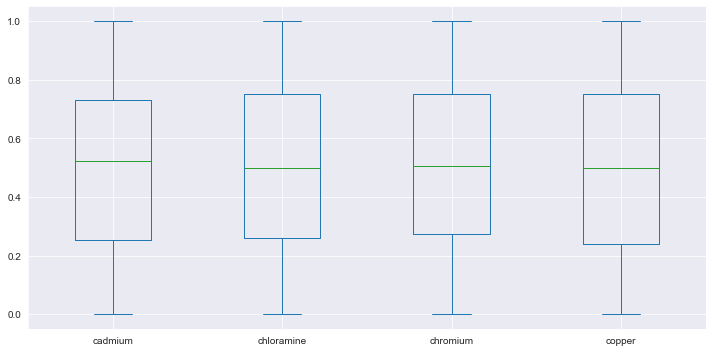

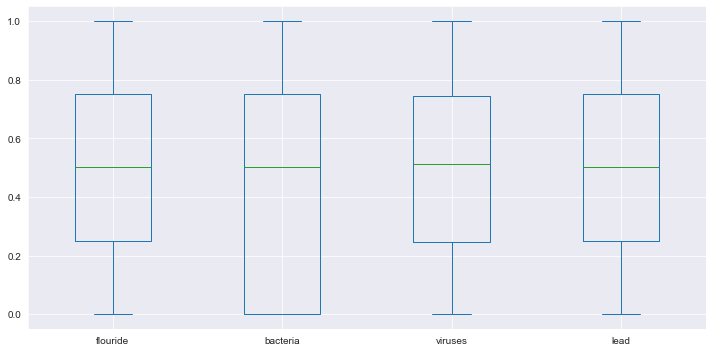

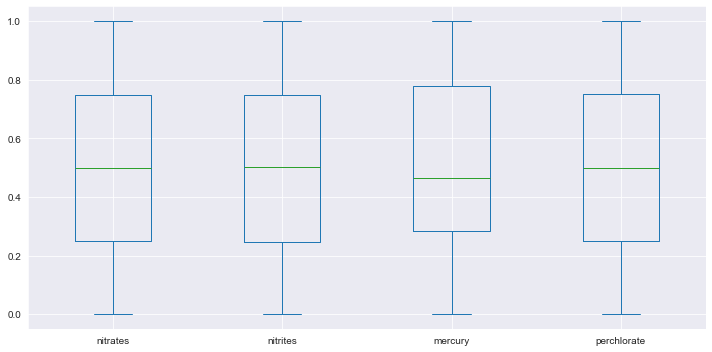

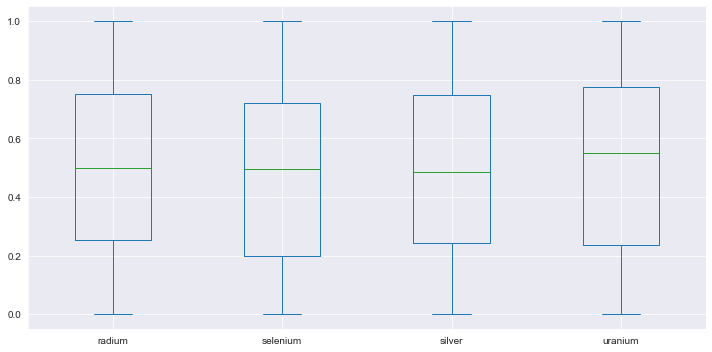

In [24]:
columns.remove('is_safe')

for col in range(0, len(columns), 4):
    plt.rcParams["figure.figsize"] = [10, 5]
    plt.rcParams["figure.autolayout"] = True
    
    ax = dataset[[columns[col], columns[col+1], columns[col+2], columns[col+3]]].plot(kind='box')
    plt.show()

# <font color='#34568B'> 6. Feature Selection </font>

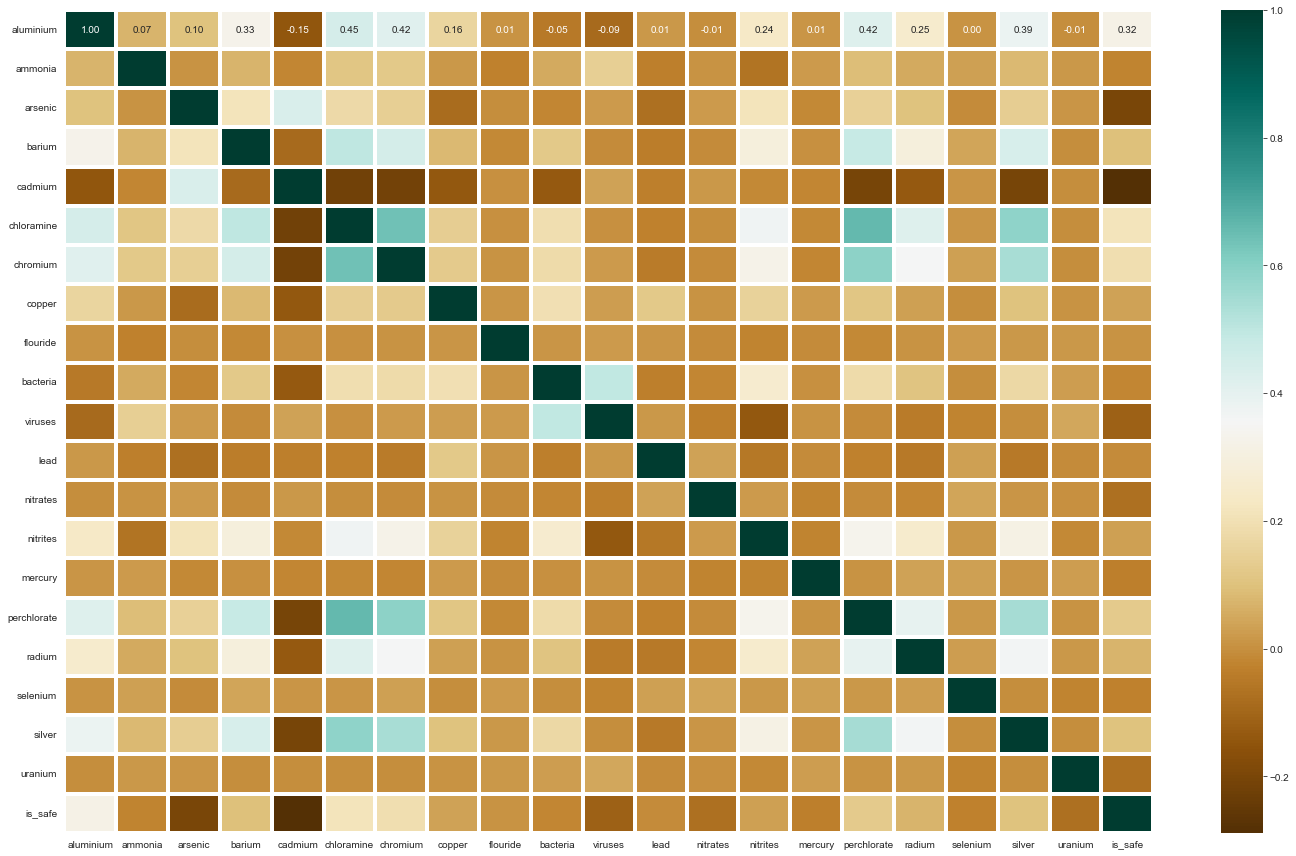

In [25]:
# plotting correlation matrix to notice relationships or lack of it between variables
corr = dataset.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

In [26]:
# Define correlation threshold.
threshold = 0.55

corr_matrix = corr.abs() # Give me all features as corr.
high_corr_var = np.where(corr_matrix >= threshold) # Take the features that have strong corr.

high_corr_var = [
    (
        corr_matrix.index[x], corr_matrix.columns[y], round(corr_matrix.iloc[x, y], 2)
    )
    for x, y in zip(*high_corr_var) if x != y and x < y
]

print()

for st in range(len(high_corr_var)):
    print(f'Relation {st+1} :')
    for i in range(len(high_corr_var[st])):
        print(high_corr_var[st][i], end=' ')
    print('\n')


Relation 1 :
chloramine chromium 0.64 

Relation 2 :
chloramine perchlorate 0.66 

Relation 3 :
chloramine silver 0.58 

Relation 4 :
chromium perchlorate 0.59 



In [27]:
# Tidy up the output.
record_collinear = pd.DataFrame(high_corr_var).rename(
    columns = {
        0: 'drop_feature',
        1: 'corr_feature',
        2: 'corr_values'
    }
)

record_collinear = record_collinear.sort_values(by = 'corr_values', ascending = False)
record_collinear = record_collinear.reset_index(drop = True)
record_collinear

,drop_feature,corr_feature,corr_values
0,chloramine,perchlorate,0.66
1,chloramine,chromium,0.64
2,chromium,perchlorate,0.59
3,chloramine,silver,0.58


In [28]:
cols_to_drop = set(record_collinear['drop_feature'])

print('\nFeatures that we want to drop :-\n')
for i, col_to_drop in enumerate(cols_to_drop):
    print(f'{i+1} -', col_to_drop)


Features that we want to drop :-

1 - chromium
2 - chloramine


In [29]:
dataset = dataset.drop(cols_to_drop, axis = 1)
columns = list(dataset.columns)
columns.remove('is_safe')
columns

['aluminium',
 'ammonia',
 'arsenic',
 'barium',
 'cadmium',
 'copper',
 'flouride',
 'bacteria',
 'viruses',
 'lead',
 'nitrates',
 'nitrites',
 'mercury',
 'perchlorate',
 'radium',
 'selenium',
 'silver',
 'uranium']

# <font color='#34568B'> 7. Split the Dataset </font>

In [30]:
X, y = dataset[columns], dataset['is_safe']
X.shape, y.shape

((7996, 18), (7996,))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5997, 18), (1999, 18), (5997,), (1999,))

# <font color='#34568B'> 8. Handle Unbalnced Data using SMOTE Method </font>

In [32]:
y_train.value_counts(normalize = True).round(2)

0.0    0.89
1.0    0.11
Name: is_safe, dtype: float64

In [33]:
print('Before SMOTE: ', Counter(y_train))

Before SMOTE:  Counter({0.0: 5335, 1.0: 662})


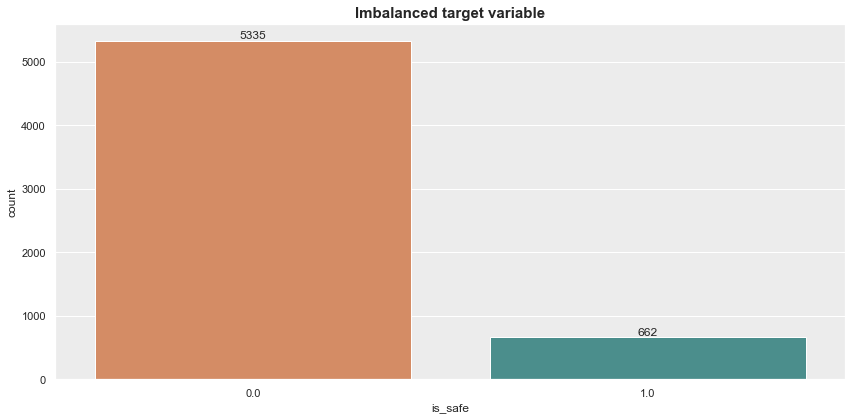

In [34]:
#plot target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=y_train, data=dataset, palette=['#E68753', '#409996'])

#add labels to each bar
abs_values = y_train.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values) 

#show the plot
plt.show()

In [35]:
# Define oversampling strategy.
# Increase the lower values to be equals to the maximum values of the target.
smote = SMOTE(sampling_strategy='minority')

# Fit and apply the transform.
X_SMOTE, y_SMOTE = smote.fit_resample(X_train, y_train)
X_SMOTE = pd.DataFrame(data = X_SMOTE, columns = X_SMOTE.columns)

print('After oversampling: ', Counter(y_SMOTE))

After oversampling:  Counter({0.0: 5335, 1.0: 5335})


In [36]:
print(f"Imbalanced target class: {Counter(y_train)}\n\nBalanced target class: {Counter(y_SMOTE)}\n")
print(X_SMOTE.shape[0] - dataset.shape[0], 'new random picked points')

Imbalanced target class: Counter({0.0: 5335, 1.0: 662})

Balanced target class: Counter({0.0: 5335, 1.0: 5335})

2674 new random picked points


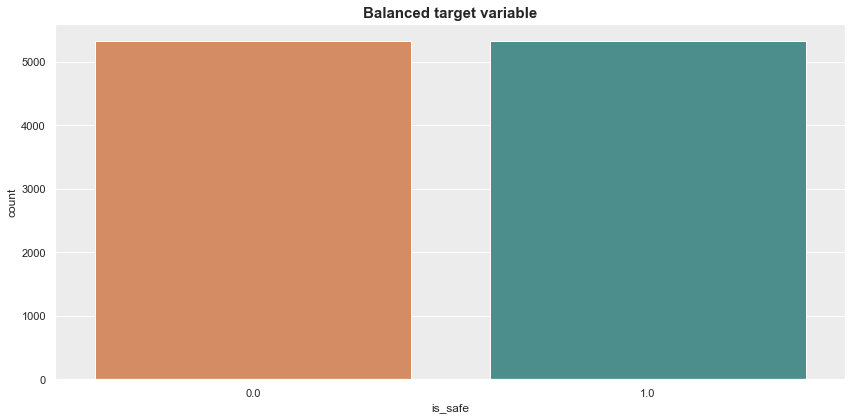

In [37]:
#plot the balanced target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=y_SMOTE, data=dataset, palette=['#E68753', '#409996'])
plt.show()

# <font color='#34568B'> 9. Build general plotting functions </font>

In [38]:
# plotting Confusion Matrix

def plot_conf_mtrix(name, y_pred, y_test):
    print()
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = plt.cm.Blues)
    ax.set_title(f'{name} Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [39]:
def cls_report(name, y_pred, y_test):
    print(f'{name} Classification Report :\n')
    print('-'*54)
    print()
    print(classification_report(y_test, y_pred))
    print('-'*54)
    print()
    print('Accuracy Score  : ' + str(round(accuracy_score(y_test, y_pred),3)))
    print('Precision Score : ' + str(round(precision_score(y_test, y_pred),3)))
    print('Recall Score    : ' + str(round(recall_score(y_test, y_pred),3)))
    print('F-Score         : ' + str(round(f1_score(y_test, y_pred),3)))

# <font color='#34568B'> 10. Train the Models using Random Split Method </font>

In [40]:
training_scores = []
training_time = []
prediction_time = []

# <font color='#34568B'> 10.1 Train Logistic Regression </font>

The model was trained successfuly.

The predicted values       : Counter({0.0: 1460, 1.0: 539}).
The real values            : Counter({0.0: 1749, 1.0: 250}).
The accuracy for the model : 0.8054
Number of mislabeled points out of a total 1999 points: 389



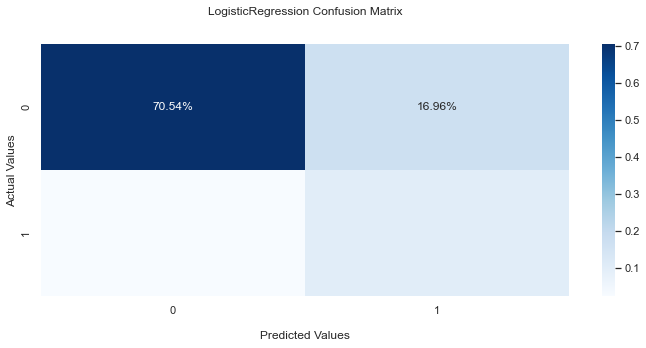

LogisticRegression Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88      1749
         1.0       0.37      0.80      0.51       250

    accuracy                           0.81      1999
   macro avg       0.67      0.80      0.69      1999
weighted avg       0.89      0.81      0.83      1999

------------------------------------------------------

Accuracy Score  : 0.805
Precision Score : 0.371
Recall Score    : 0.8
F-Score         : 0.507


In [41]:
logreg = LogisticRegression()

start = time.time()
logreg = logreg.fit(X_SMOTE, y_SMOTE)
end = time.time()
training_time.append(end - start)
print('The model was trained successfuly.\n')

# Make predictions using the logistic regression model.
start = time.time()
logreg_y_pred = logreg.predict(X_test)
end = time.time()
prediction_time.append(end - start)

training_scores.append(logreg.score(X_SMOTE, y_SMOTE))

print(f'The predicted values       : {Counter(logreg_y_pred)}.')
print(f'The real values            : {Counter(y_test)}.')
print(f'The accuracy for the model : {accuracy_score(y_test, logreg_y_pred).round(4)}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test.shape[0], (y_test != logreg_y_pred).sum()))

plot_conf_mtrix(logreg.__class__.__name__, logreg_y_pred, y_test)
cls_report(logreg.__class__.__name__, logreg_y_pred, y_test)

# <font color='#34568B'> 10.2 Train KNN </font>

The model was trained successfuly.

The predicted values       : Counter({0.0: 1419, 1.0: 580}).
The real values            : Counter({0.0: 1749, 1.0: 250}).
The accuracy for the model : 0.7949
Number of mislabeled points out of a total 1999 points: 410



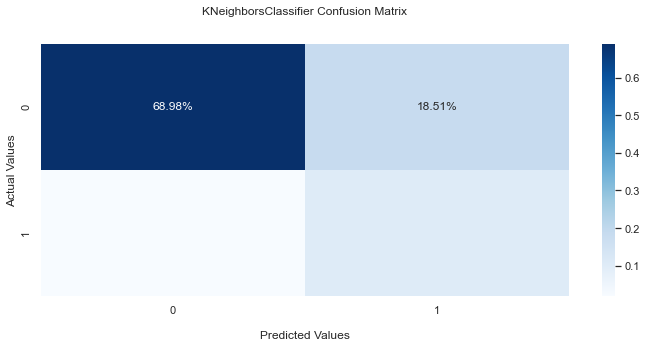

KNeighborsClassifier Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87      1749
         1.0       0.36      0.84      0.51       250

    accuracy                           0.79      1999
   macro avg       0.67      0.81      0.69      1999
weighted avg       0.90      0.79      0.82      1999

------------------------------------------------------

Accuracy Score  : 0.795
Precision Score : 0.362
Recall Score    : 0.84
F-Score         : 0.506


In [42]:
knn = KNeighborsClassifier()

start = time.time()
knn.fit(X_SMOTE, y_SMOTE)
end = time.time()

training_time.append(end - start)
print('The model was trained successfuly.\n')

# Make predictions using the KNN model.
start = time.time()
knn_y_pred = knn.predict(X_test)
end = time.time()
prediction_time.append(end - start)

training_scores.append(knn.score(X_SMOTE, y_SMOTE))

print(f'The predicted values       : {Counter(knn_y_pred)}.')
print(f'The real values            : {Counter(y_test)}.')
print(f'The accuracy for the model : {accuracy_score(y_test, knn_y_pred).round(4)}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test.shape[0], (y_test != knn_y_pred).sum()))

plot_conf_mtrix(knn.__class__.__name__, knn_y_pred, y_test)
cls_report(knn.__class__.__name__, knn_y_pred, y_test)

# <font color='#34568B'> 10.3 Train SVM </font>

The model was trained successfuly.

The predicted values       : Counter({0.0: 1683, 1.0: 316}).
The real values            : Counter({0.0: 1749, 1.0: 250}).
The accuracy for the model : 0.913
Number of mislabeled points out of a total 1999 points: 174



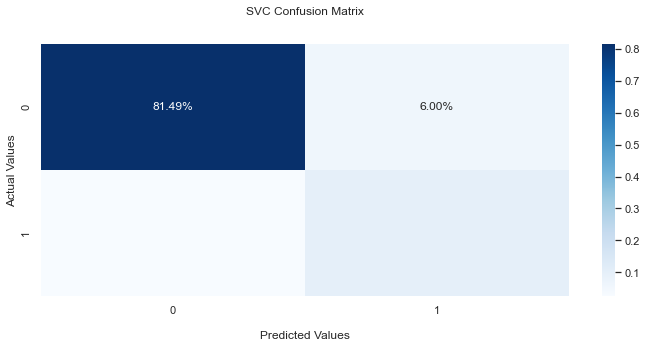

SVC Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      1749
         1.0       0.62      0.78      0.69       250

    accuracy                           0.91      1999
   macro avg       0.79      0.86      0.82      1999
weighted avg       0.92      0.91      0.92      1999

------------------------------------------------------

Accuracy Score  : 0.913
Precision Score : 0.62
Recall Score    : 0.784
F-Score         : 0.693


In [43]:
svm = SVC()

start = time.time()
svm = svm.fit(X_SMOTE, y_SMOTE)
end = time.time()
training_time.append(end - start)
print('The model was trained successfuly.\n')

# Make predictions using the suppoert vector machine model.
start = time.time()
svm_y_pred = svm.predict(X_test)
end = time.time()
prediction_time.append(end - start)

training_scores.append(svm.score(X_SMOTE, y_SMOTE))

print(f'The predicted values       : {Counter(svm_y_pred)}.')
print(f'The real values            : {Counter(y_test)}.')
print(f'The accuracy for the model : {accuracy_score(y_test, svm_y_pred).round(4)}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test.shape[0], (y_test != svm_y_pred).sum()))

plot_conf_mtrix(svm.__class__.__name__, svm_y_pred, y_test)
cls_report(svm.__class__.__name__, svm_y_pred, y_test)

# <font color='#34568B'> 10.4 Train Decision Tree </font>

The model was trained successfuly.

The predicted values       : Counter({0.0: 1744, 1.0: 255}).
The real values            : Counter({0.0: 1749, 1.0: 250}).
The accuracy for the model : 0.9425
Number of mislabeled points out of a total 1999 points: 115



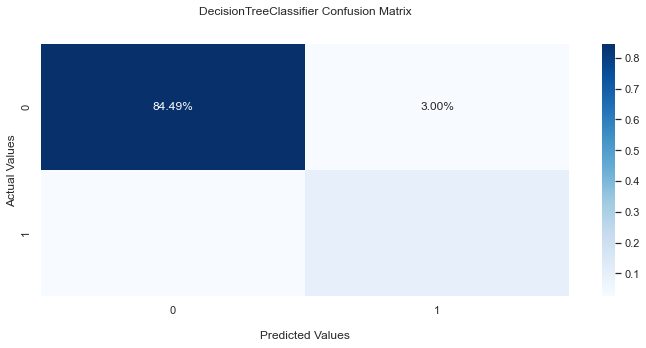

DecisionTreeClassifier Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1749
         1.0       0.76      0.78      0.77       250

    accuracy                           0.94      1999
   macro avg       0.87      0.87      0.87      1999
weighted avg       0.94      0.94      0.94      1999

------------------------------------------------------

Accuracy Score  : 0.942
Precision Score : 0.765
Recall Score    : 0.78
F-Score         : 0.772


In [44]:
clf_tree = DecisionTreeClassifier()

start = time.time()
clf_tree = clf_tree.fit(X_SMOTE, y_SMOTE)
end = time.time()
training_time.append(end - start)
print('The model was trained successfuly.\n')

# Make predictions using the decision tree model.
start = time.time()
clf_tree_y_pred = clf_tree.predict(X_test) 
end = time.time()
prediction_time.append(end - start)

training_scores.append(clf_tree.score(X_SMOTE, y_SMOTE))

print(f'The predicted values       : {Counter(clf_tree_y_pred)}.')
print(f'The real values            : {Counter(y_test)}.')
print(f'The accuracy for the model : {accuracy_score(y_test, clf_tree_y_pred).round(4)}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test.shape[0], (y_test != clf_tree_y_pred).sum()))

plot_conf_mtrix(clf_tree.__class__.__name__, clf_tree_y_pred, y_test)
cls_report(clf_tree.__class__.__name__, clf_tree_y_pred, y_test)

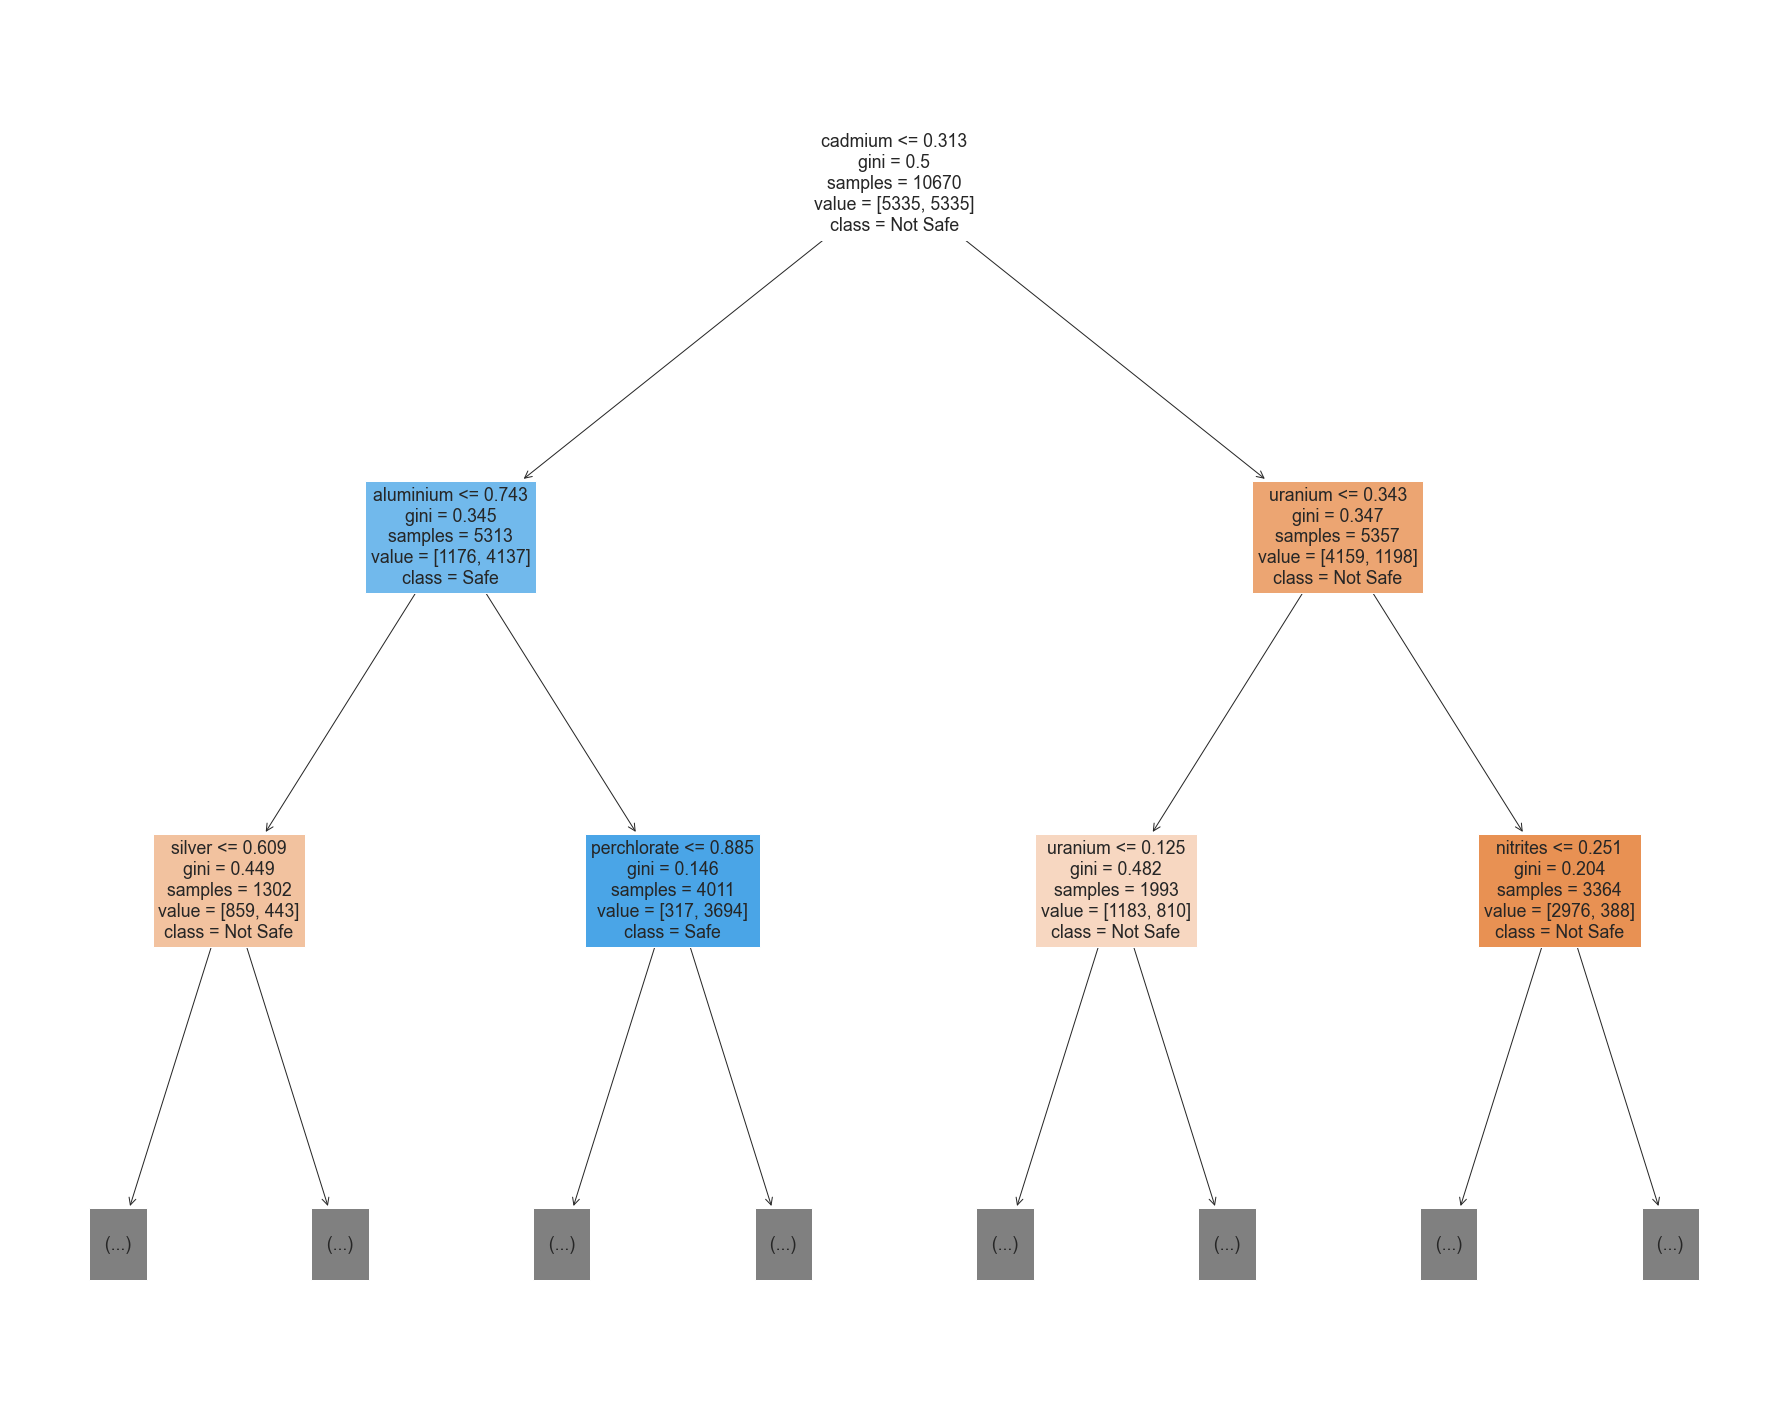

In [45]:
fig = plt.figure(figsize = (25, 20));

tree.plot_tree(
    clf_tree,
    feature_names = list(columns),
    class_names = ['Not Safe', 'Safe'],
    max_depth = 2,
    filled = True
);

# <font color='#34568B'> 11.5 Train Random Forest </font>

The model was trained successfuly.

The predicted values       : Counter({0.0: 1759, 1.0: 240}).
The real values            : Counter({0.0: 1749, 1.0: 250}).
The accuracy for the model : 0.96
Number of mislabeled points out of a total 1999 points: 80



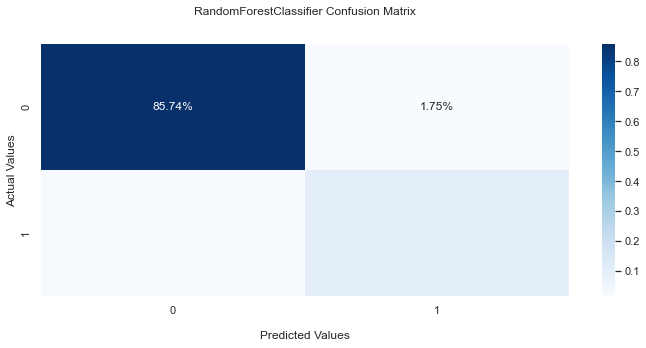

RandomForestClassifier Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1749
         1.0       0.85      0.82      0.84       250

    accuracy                           0.96      1999
   macro avg       0.91      0.90      0.91      1999
weighted avg       0.96      0.96      0.96      1999

------------------------------------------------------

Accuracy Score  : 0.96
Precision Score : 0.854
Recall Score    : 0.82
F-Score         : 0.837


In [46]:
rand_forest = RandomForestClassifier()

start = time.time()
rand_forest = rand_forest.fit(X_SMOTE, y_SMOTE)
end = time.time()
training_time.append(end - start)
print('The model was trained successfuly.\n')

# Make predictions using the random forest model.
start = time.time()
rf_y_pred = rand_forest.predict(X_test)
end = time.time()
prediction_time.append(end - start)

training_scores.append(rand_forest.score(X_SMOTE, y_SMOTE))

print(f'The predicted values       : {Counter(rf_y_pred)}.')
print(f'The real values            : {Counter(y_test)}.')
print(f'The accuracy for the model : {accuracy_score(y_test, rf_y_pred).round(4)}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test.shape[0], (y_test != rf_y_pred).sum()))

plot_conf_mtrix(rand_forest.__class__.__name__, rf_y_pred, y_test)
cls_report(rand_forest.__class__.__name__, rf_y_pred, y_test)

# <font color='#34568B'> 11. Train the Models using Cross Validation Method </font>

Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models.

It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500" height="500"><br>

# <font color='#34568B'> 11.1 Train test split for the Cross Validation </font>

In [47]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y, test_size = 0.1, random_state = 42)
print(X_train_cv.shape, X_test_cv.shape, y_train_cv.shape, y_test_cv.shape)

smote_cv = SMOTE(sampling_strategy='minority')

X_SMOTE_cv, y_SMOTE_cv = smote_cv.fit_resample(X_train_cv, y_train_cv)
X_SMOTE_cv = pd.DataFrame(data = X_SMOTE_cv, columns = X_SMOTE_cv.columns)

(7196, 18) (800, 18) (7196,) (800,)


# <font color='#34568B'> 11.2 Using cross_val_score </font>

In [48]:
from sklearn.model_selection import cross_val_score

cross_validation_t_time = []
cross_validation_scores = []

cv_models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'SVM' : SVC(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
}

for model in cv_models:
    
    start = time.time()
    scores = cross_val_score(cv_models[model], X_SMOTE_cv, y_SMOTE_cv, cv = 10)
    end = time.time()
    
    print(f'{model} List of scores :\n{scores}')
    
    cross_validation_t_time.append(end - start)
    
    avg_scores = np.mean(scores)
    
    print(f'{model} Average Score : {avg_scores}\n')
    
    cross_validation_scores.append(avg_scores)

Logistic Regression List of scores :
[0.79733959 0.7942097  0.81362569 0.8018794  0.80657792 0.78856695
 0.80814409 0.81675803 0.79404855 0.80892717]
Logistic Regression Average Score : 0.8030077095304797

KNN List of scores :
[0.89514867 0.88419405 0.88410337 0.89350039 0.8825372  0.88566954
 0.88801879 0.89193422 0.88958496 0.88880188]
KNN Average Score : 0.8883493075393105

SVM List of scores :
[0.95226917 0.94757433 0.96084573 0.95379796 0.96162882 0.95849648
 0.95301488 0.95379796 0.95849648 0.95849648]
SVM Average Score : 0.9558418290128836

Decision Tree List of scores :
[0.93035994 0.96322379 0.97494127 0.97729052 0.97415818 0.97572435
 0.97572435 0.9678935  0.96945967 0.96476116]
Decision Tree Average Score : 0.9673536739448263

Random Forest List of scores :
[0.95618153 0.9827856  0.98355521 0.97807361 0.98668755 0.98042287
 0.98512138 0.97572435 0.98433829 0.98120595]
Random Forest Average Score : 0.9794096345234025



In [49]:
print('Accuracies using Average Cross Validation :-\n')
for i, model in enumerate(cv_models):
    print(model, cross_validation_scores[i])

Accuracies using Average Cross Validation :-

Logistic Regression 0.8030077095304797
KNN 0.8883493075393105
SVM 0.9558418290128836
Decision Tree 0.9673536739448263
Random Forest 0.9794096345234025


In [50]:
cv_rf = RandomForestClassifier()

cv_rf.fit(X_SMOTE_cv, y_SMOTE_cv)

y_pred = cv_rf.predict(X_test)

print('Accuracy for the best model using the fainal testing set :-')
print(accuracy_score(y_test, y_pred).round(4))

Accuracy for the best model using the fainal testing set :-
0.985


# <font color='#34568B'> 12. Tune the Models with Hyperparameters using GridSearchCV </font>

<img src="https://www.educative.io/v2api/editorpage/5608131475275776/image/6268938567548928" width="500" height="500"><br>

GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. The performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.
It use the cross validation concept with hyperparameters tuning concept to find the best possible natural model in this situation ever.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT9csQ_nXkFOWY4W5a9_JGRyyPPIUnC2CzCkA&usqp=CAU" width="500" height="500"><br>

#### How does GridSearchCV work?

We pass predefined values for hyperparameters to the GridSearchCV function. We do this by defining a dictionary in which we mention a particular hyperparameter along with the values it can take. Here is an example of it :

{
  
  'C': [0.1, 1, 10, 100, 1000],
  
  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
  
  'kernel': ['rbf',’linear’,'sigmoid']
  
}

If we initialize the value of cv to 10, then the number of possible models for this problem are :-

$$ Domain(C) * Domain(gamma) * Domain(kernel) * cv = 5 * 5 * 3 * 10 = 750 models $$
- The job of GridSearchCV is to find the best model between the 750 models.

--------------------------------------------------------------------------------------------------------------------------

To save our time, we will tune the best five models, which are SVM, Decision tree, Random Forest, Adaboost, and XGBoost.

But we write the codes for training the other algorithms, which maybe require some time and space to execute, such as KNN.

In [51]:
training_time_hyp = []
prediction_time_hyp = []
training_scores_hyp = []
accuracies_hyp = []

In [52]:
X_train_hyp, X_test_hyp, y_train_hyp, y_test_hyp = train_test_split(X, y, test_size = 0.1, random_state = 42)
print(X_train_hyp.shape, X_test_hyp.shape, y_train_hyp.shape, y_test_hyp.shape)

smote_hyp = SMOTE(sampling_strategy='minority')

X_SMOTE_hyp, y_SMOTE_hyp = smote_hyp.fit_resample(X_train_hyp, y_train_hyp)
X_SMOTE_hyp = pd.DataFrame(data = X_SMOTE_hyp, columns = X_SMOTE_hyp.columns)

(7196, 18) (800, 18) (7196,) (800,)


# <font color='#34568B'> The hyperparameters for Logistic Regression we used </font>

#### 1. Penalty :

    penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
    Specify the norm of the penalty:

    - None: no penalty is added;

    - 'l2': add a L2 penalty term and it is the default choice;

    - 'l1': add a L1 penalty term;

    - 'elasticnet': both L1 and L2 penalty terms are added.

#### 2. C :

     The default is 1.0, this parameter signifies strength of the regularization and takes a positive float value. C and
     regularization strength are negatively correlated (smaller the C is stronger the regularization will be).

#### 3. Solver :

    solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
    Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the
    following aspects:

    - For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

    - For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

    - ‘liblinear’ is limited to one-versus-rest schemes.

    - ‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical
    features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction
    for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features
    because it explicitly computes the Hessian matrix.

The model was trained successfuly.

The predicted values       : Counter({0.0: 589, 1.0: 211}).
The real values            : Counter({0.0: 698, 1.0: 102}).
The accuracy for the model : 0.8038
Number of mislabeled points out of a total 800 points: 157



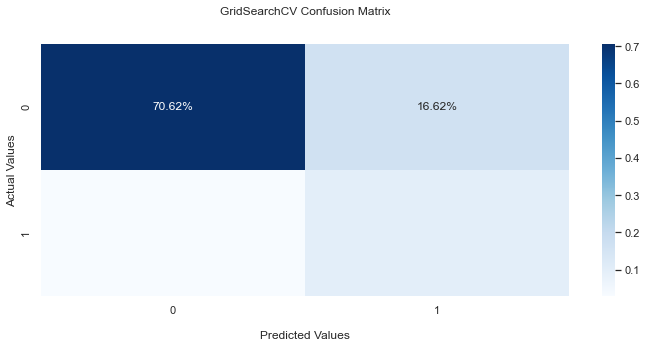

GridSearchCV Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88       698
         1.0       0.37      0.76      0.50       102

    accuracy                           0.80       800
   macro avg       0.66      0.79      0.69       800
weighted avg       0.88      0.80      0.83       800

------------------------------------------------------

Accuracy Score  : 0.804
Precision Score : 0.37
Recall Score    : 0.765
F-Score         : 0.498


In [53]:
lr_hyp = LogisticRegression()

penalty = ['l1', 'l2', 'elasticnet', 'none']
C       = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver  = ['lbfgs','newton-cg','liblinear','sag','saga']

lr_hyperparameters = dict(penalty=penalty, C=C, solver=solver)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(
    estimator=lr_hyp,
    param_grid=lr_hyperparameters,
    cv=cv,
    scoring='accuracy',
    return_train_score=True
)

start = time.time()
best_lr = grid_search.fit(X_SMOTE_hyp, y_SMOTE_hyp)
end = time.time()

t_time = end - start

print('The model was trained successfuly.\n')

start = time.time()
lr_y_pred_hyp = best_lr.predict(X_test_hyp)
end = time.time()

p_time = end - start

t_score = best_lr.score(X_SMOTE_hyp, y_SMOTE_hyp)

print(f'The predicted values       : {Counter(lr_y_pred_hyp)}.')
print(f'The real values            : {Counter(y_test_hyp)}.')

accu = accuracy_score(y_test_hyp, lr_y_pred_hyp).round(4)

print(f'The accuracy for the model : {accu}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test_hyp.shape[0], (y_test_hyp != lr_y_pred_hyp).sum()))

plot_conf_mtrix(best_lr.__class__.__name__, lr_y_pred_hyp, y_test_hyp)
cls_report(best_lr.__class__.__name__, lr_y_pred_hyp, y_test_hyp)

In [54]:
# Best Hyperparameters Value
print('Best penalty:', best_lr.best_estimator_.get_params()['penalty'])
print('Best C:', best_lr.best_estimator_.get_params()['C'])
print('Best solver:', best_lr.best_estimator_.get_params()['solver'])

Best penalty: l1
Best C: 0.1
Best solver: liblinear


In [55]:
training_time_hyp.append(t_time)
prediction_time_hyp.append(p_time)
training_scores_hyp.append(t_score)
accuracies_hyp.append(accu)

# <font color='#34568B'> The hyperparameters for KNN we used </font>

#### 1. n_neighbors :

    Default=5, Number of neighbors to use by default for kneighbors queries.

#### 2. weights :

    weights{‘uniform’, ‘distance’}, callable or None, default=’uniform’
    Weight function used in prediction. Possible values:

    - ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

    - ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will
    have a greater influence than neighbors which are further away.

    - [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape
    containing the weights.

#### 3. metric :

    Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when
    p = 2. We will mention three types of metrices that are used to calculate distances.
    
    - Euclidean Distance – This distance is the most widely used one as it is the default metric that SKlearn library of
    Python uses for K-Nearest Neighbour. It is a measure of the true straight line distance between two points in
    Euclidean space.
    
    - Manhattan Distance : This distance is also known as taxicab distance or city block distance, that is because the
    way this distance is calculated. The distance between two points is the sum of the absolute differences of their
    Cartesian coordinates.
    
    - Minkowski Distance : It is a metric intended for real-valued vector spaces. We can calculate Minkowski distance only
    in a normed vector space, which means in a space where distances can be represented as a vector that has a length and
    the lengths cannot be negative.

#### 4. Algorithm :

    algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
    Algorithm used to compute the nearest neighbors:

    - ‘ball_tree’ will use BallTree

    - ‘kd_tree’ will use KDTree

    - ‘brute’ will use a brute-force search.

    - ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

#### Note :

    We will not use GridSearchCV with KNN, because it cost us a lot of time for execution, and it causes lagging
    in our computer.

The model was trained successfuly.

The predicted values       : Counter({0.0: 657, 1.0: 143}).
The predicted values       : Counter({0.0: 698, 1.0: 102}).
The accuracy for the model : 0.8012
Number of mislabeled points out of a total 1999 points: 159



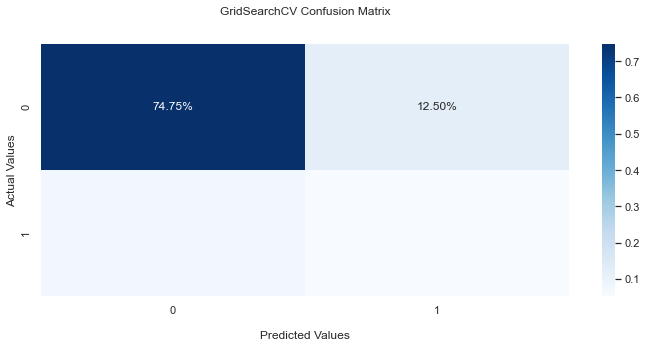

GridSearchCV Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88       698
         1.0       0.30      0.42      0.35       102

    accuracy                           0.80       800
   macro avg       0.61      0.64      0.62       800
weighted avg       0.83      0.80      0.81       800

------------------------------------------------------

Accuracy Score  : 0.801
Precision Score : 0.301
Recall Score    : 0.422
F-Score         : 0.351


In [56]:
knn_hyp = KNeighborsClassifier()

n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
weights = ['distance'] # uniform
metric = ['euclidean'] # 'manhattan', 'minkowski'
algorithm = ['auto'] # 'ball_tree', 'kd_tree', 'brute'

knn_hyperparameters = dict(n_neighbors=n_neighbors,weights=weights,metric=metric,algorithm=algorithm)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

grid_search = GridSearchCV(
    estimator=knn_hyp,
    param_grid=knn_hyperparameters,
    cv=cv,
    scoring='accuracy',
    return_train_score=True
)

start = time.time()
best_knn = grid_search.fit(X_SMOTE_hyp, y_SMOTE_hyp)
end = time.time()

training_time_hyp.append(end - start)

print('The model was trained successfuly.\n')

start = time.time()
knn_y_pred_hyp = best_knn.predict(X_test_hyp)
end = time.time()

prediction_time_hyp.append(end - start)

training_scores_hyp.append(best_knn.score(X_SMOTE_hyp, y_SMOTE_hyp))

print(f'The predicted values       : {Counter(knn_y_pred_hyp)}.')
print(f'The predicted values       : {Counter(y_test_hyp)}.')

accu = accuracy_score(y_test_hyp, knn_y_pred_hyp).round(4)
accuracies_hyp.append(accu)

print(f'The accuracy for the model : {accu}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test.shape[0], (y_test_hyp != knn_y_pred_hyp).sum()))

plot_conf_mtrix(best_knn.__class__.__name__, knn_y_pred_hyp, y_test_hyp)
cls_report(best_knn.__class__.__name__, knn_y_pred_hyp, y_test_hyp)

In [57]:
# Best Hyperparameters Value
print('Best n_neighbors:', best_knn.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', best_knn.best_estimator_.get_params()['weights'])
print('Best metric:', best_knn.best_estimator_.get_params()['metric'])
print('Best algorithm:', best_knn.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 1
Best weights: distance
Best metric: euclidean
Best algorithm: auto


In [58]:
training_time_hyp.append(t_time)
prediction_time_hyp.append(p_time)
training_scores_hyp.append(t_score)
accuracies_hyp.append(accu)

# <font color='#34568B'> The hyperparameters for SVM we used </font>

#### 1. kernel :

    kernel function transforms the training dataset into higher dimensions to make it linearly separable. The default kernel
    function for the python implementation of the support vector classifier is the Radial Basis Function, which is usually
    referred to as rbf. The kernel function can take other values such as linear, poly, rbf, or sigmoid.

#### 2. C :

    C is the l2 regularization parameter. The value of C is inversely proportional to the strength of the regularization.

#### 3. gamma :

    gamma is the kernel coefficient for rbf, poly, and sigmoid. It can be seen as the inverse of the support vector
    influence radius. The gamma parameter highly impacts the model performance.

The model was trained successfuly.

The predicted values       : Counter({0.0: 708, 1.0: 92}).
The real values       : Counter({0.0: 698, 1.0: 102}).
The accuracy for the model : 0.905
Number of mislabeled points out of a total 800 points: 76



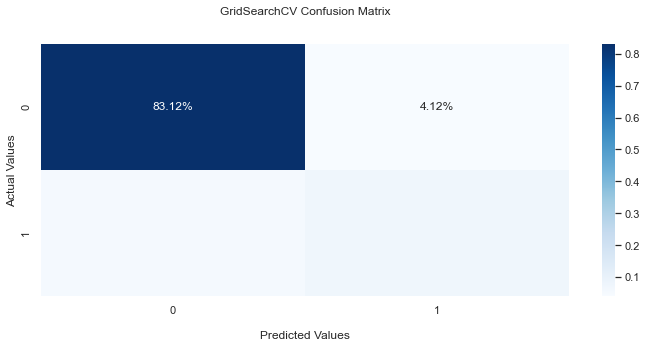

GridSearchCV Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       698
         1.0       0.64      0.58      0.61       102

    accuracy                           0.91       800
   macro avg       0.79      0.77      0.78       800
weighted avg       0.90      0.91      0.90       800

------------------------------------------------------

Accuracy Score  : 0.905
Precision Score : 0.641
Recall Score    : 0.578
F-Score         : 0.608


In [59]:
svm_hyp = SVC()

kernel = ['poly', 'rbf', 'sigmoid']
C = [1, 10, 100]
gamma = ['scale']

svm_hyperparameters = dict(kernel=kernel, C=C, gamma=gamma)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(
    estimator=svm_hyp,
    param_grid=svm_hyperparameters,
    n_jobs=-1,
    cv=cv,
    scoring='accuracy',
    error_score=0,
    return_train_score=True
)

start = time.time()
best_svm = grid_search.fit(X_SMOTE_hyp, y_SMOTE_hyp)
end = time.time()

t_time = end - start

print('The model was trained successfuly.\n')

start = time.time()
svm_y_pred_hyp = best_svm.predict(X_test_hyp)
end = time.time()

p_time = end - start

t_score = best_svm.score(X_SMOTE_hyp, y_SMOTE_hyp)

print(f'The predicted values       : {Counter(svm_y_pred_hyp)}.')
print(f'The real values       : {Counter(y_test_hyp)}.')

accu = accuracy_score(y_test_hyp, svm_y_pred_hyp).round(4)

print(f'The accuracy for the model : {accu}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test_hyp.shape[0], (y_test_hyp != svm_y_pred_hyp).sum()))

plot_conf_mtrix(best_svm.__class__.__name__, svm_y_pred_hyp, y_test_hyp)
cls_report(best_svm.__class__.__name__, svm_y_pred_hyp, y_test_hyp)

In [60]:
# Best Hyperparameters Value
print('Best kernel:', best_svm.best_estimator_.get_params()['kernel'])
print('Best C:', best_svm.best_estimator_.get_params()['C'])
print('Best gamma:', best_svm.best_estimator_.get_params()['gamma'])

Best kernel: rbf
Best C: 100
Best gamma: scale


In [61]:
training_time_hyp.append(t_time)
prediction_time_hyp.append(p_time)
training_scores_hyp.append(t_score)
accuracies_hyp.append(accu)

# <font color='#34568B'> The hyperparameters for Decision Tree we used </font>

#### 1. criterion :

    criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
    The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss”
    and “entropy” both for the Shannon information gain.

#### 2. max_depth :

    max_depthint, default=None
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain
    less than min_samples_split samples.

#### 3. max_features :

    The number of features to consider when looking for the best split:

    - If int, then consider max_features features at each split.

    - If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at
    each split.

    - If “auto”, then max_features=sqrt(n_features).

    - If “sqrt”, then max_features=sqrt(n_features).

    - If “log2”, then max_features=log2(n_features).

    - If None, then max_features=n_features.

The model was trained successfuly.

The predicted values       : Counter({0.0: 690, 1.0: 110}).
The real values            : Counter({0.0: 698, 1.0: 102}).
The accuracy for the model : 0.9375
Number of mislabeled points out of a total 800 points: 50



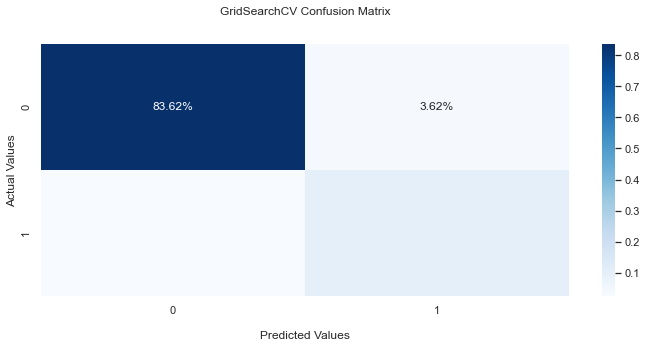

GridSearchCV Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       698
         1.0       0.74      0.79      0.76       102

    accuracy                           0.94       800
   macro avg       0.85      0.88      0.86       800
weighted avg       0.94      0.94      0.94       800

------------------------------------------------------

Accuracy Score  : 0.938
Precision Score : 0.736
Recall Score    : 0.794
F-Score         : 0.764


In [62]:
dt_hyp = DecisionTreeClassifier()

criterion = ["gini", "entropy"]
max_depth = [2, 4, 6, 8, 10]
max_features = ['auto', 'sqrt', 'log2']

dt_hyperparameters = dict(
    criterion=criterion,
    max_depth=max_depth,
    max_features=max_features
)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(
    estimator=dt_hyp,
    param_grid=dt_hyperparameters,
    n_jobs=-1,
    cv=cv,
    scoring='accuracy',
    error_score=0,
    return_train_score=True
)

start = time.time()
best_dt = grid_search.fit(X_SMOTE_hyp, y_SMOTE_hyp)
end = time.time()

t_time = end - start

print('The model was trained successfuly.\n')

start = time.time()
dt_y_pred_hyp = best_dt.predict(X_test_hyp)
end = time.time()

p_time = end - start

t_score = best_dt.score(X_SMOTE_hyp, y_SMOTE_hyp)

print(f'The predicted values       : {Counter(dt_y_pred_hyp)}.')
print(f'The real values            : {Counter(y_test_hyp)}.')

accu = accuracy_score(y_test_hyp, dt_y_pred_hyp).round(4)

print(f'The accuracy for the model : {accu}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test_hyp.shape[0], (y_test_hyp != dt_y_pred_hyp).sum()))

plot_conf_mtrix(best_dt.__class__.__name__, dt_y_pred_hyp, y_test_hyp)
cls_report(best_dt.__class__.__name__, dt_y_pred_hyp, y_test_hyp)

In [63]:
# Best Hyperparameters Value
print('Best criterion:', best_dt.best_estimator_.get_params()['criterion'])
print('Best max_depth:', best_dt.best_estimator_.get_params()['max_depth'])
print('Best max_features:', best_dt.best_estimator_.get_params()['max_features'])

Best criterion: entropy
Best max_depth: 10
Best max_features: log2


In [64]:
training_time_hyp.append(t_time)
prediction_time_hyp.append(p_time)
training_scores_hyp.append(t_score)
accuracies_hyp.append(accu)

# <font color='#34568B'> The hyperparameters for Random Forest we used </font>

#### 1. n_estimators :

    Specifies the number of trees in the forest of the model. The default value for this parameter is 10, which means that
    10 different decision trees will be constructed in the random forest.

The model was trained successfuly.

The predicted values       : Counter({0.0: 679, 1.0: 121}).
The real values            : Counter({0.0: 698, 1.0: 102}).
The accuracy for the model : 0.9588
Number of mislabeled points out of a total 800 points: 33



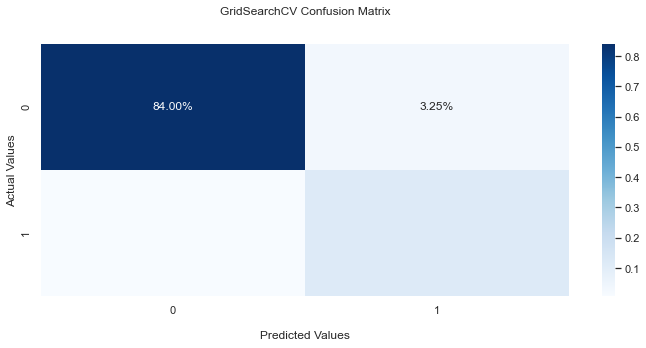

GridSearchCV Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       698
         1.0       0.79      0.93      0.85       102

    accuracy                           0.96       800
   macro avg       0.89      0.95      0.91       800
weighted avg       0.96      0.96      0.96       800

------------------------------------------------------

Accuracy Score  : 0.959
Precision Score : 0.785
Recall Score    : 0.931
F-Score         : 0.852


In [65]:
rf_hyp = RandomForestClassifier()

n_estimators = [100, 200, 500]
criterion = ["gini", "entropy"]
max_depth = [2, 4, 6, 8, 10]
max_features = ['auto', 'sqrt', 'log2']

rf_hyperparameters = dict(
    n_estimators=n_estimators,
    criterion=criterion,
    max_depth=max_depth,
    max_features=max_features
)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(
    estimator=rf_hyp,
    param_grid=rf_hyperparameters,
    n_jobs=-1,
    cv=cv,
    scoring='accuracy',
    error_score=0,
    return_train_score=True
)

start = time.time()
best_rf = grid_search.fit(X_SMOTE_hyp, y_SMOTE_hyp)
end = time.time()

t_time = end - start

print('The model was trained successfuly.\n')

start = time.time()
rf_y_pred_hyp = best_rf.predict(X_test_hyp)
end = time.time()

p_time = end - start

t_score = best_rf.score(X_SMOTE_hyp, y_SMOTE_hyp)

print(f'The predicted values       : {Counter(rf_y_pred_hyp)}.')
print(f'The real values            : {Counter(y_test_hyp)}.')

accu = accuracy_score(y_test_hyp, rf_y_pred_hyp).round(4)

print(f'The accuracy for the model : {accu}')
print('Number of mislabeled points out of a total %d points: %d' % (X_test_hyp.shape[0], (y_test_hyp != rf_y_pred_hyp).sum()))

plot_conf_mtrix(best_rf.__class__.__name__, rf_y_pred_hyp, y_test_hyp)
cls_report(best_rf.__class__.__name__, rf_y_pred_hyp, y_test_hyp)

In [66]:
# Best Hyperparameters Value
print('Best n_estimators:', best_rf.best_estimator_.get_params()['n_estimators'])
print('Best criterion:', best_rf.best_estimator_.get_params()['criterion'])
print('Best max_depth:', best_rf.best_estimator_.get_params()['max_depth'])
print('Best max_features:', best_rf.best_estimator_.get_params()['max_features'])

Best n_estimators: 200
Best criterion: entropy
Best max_depth: 10
Best max_features: auto


In [67]:
training_time_hyp.append(t_time)
prediction_time_hyp.append(p_time)
training_scores_hyp.append(t_score)
accuracies_hyp.append(accu)

## <font color='#34568B'> 13. Model Selection </font>

Model selection is the process of selecting one final machine learning model from among a collection of candidate machine learning models for a training dataset.

Model selection is a process that can be applied both across different types of models (e.g. logistic regression, SVM, KNN, etc.) and across models of the same type configured with different model hyperparameters (e.g. different kernels in an SVM).

There are two main classes of techniques to approximate the ideal case of model selection; they are:

- Probabilistic Measures: Choose a model via in-sample error and complexity.
- Resampling Methods: Choose a model via estimated out-of-sample error.

In this project we choose the Resampling Method.

Resampling methods seek to estimate the performance of a model (or more precisely, the model development process) on out-of-sample data.

Three common resampling model selection methods include:

- Random train/test splits.
- Cross-Validation (k-fold, LOOCV, etc.).
- Bootstrap.

<img src="https://dezyre.gumlet.io/images/blog/model-selection-in-machine-learning/Model_Evaluation_and_Selection_in_Data_Mining.png?w=330&dpr=2.6" width="500" height="500"><br>

In [69]:
best_model = best_rf

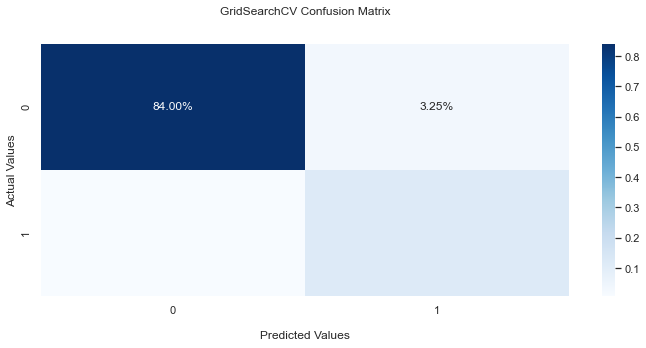

GridSearchCV Classification Report :

------------------------------------------------------

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       698
         1.0       0.79      0.93      0.85       102

    accuracy                           0.96       800
   macro avg       0.89      0.95      0.91       800
weighted avg       0.96      0.96      0.96       800

------------------------------------------------------

Accuracy Score  : 0.959
Precision Score : 0.785
Recall Score    : 0.931
F-Score         : 0.852


In [72]:
plot_conf_mtrix(best_model.__class__.__name__, rf_y_pred_hyp, y_test_hyp)
cls_report(best_model.__class__.__name__, rf_y_pred_hyp, y_test_hyp)